<a href="https://colab.research.google.com/github/Brandon56-code/ola_bike-ride-request/blob/main/Data_Cleaning%2C_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
!pip install gdown


In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Load Dataset

In [3]:
# Loading data from google drive
file_id = "1Qnpb1--5liNmMvxoe3iM6Rz4yJMkTDFH"
url = f"https://drive.google.com/uc?id={file_id}"

output = "dataset.csv"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1Qnpb1--5liNmMvxoe3iM6Rz4yJMkTDFH
To: /content/dataset.csv
100%|██████████| 648k/648k [00:00<00:00, 40.7MB/s]


'dataset.csv'

In [13]:
df = pd.read_csv("dataset.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Inspect data

In [5]:
# Inspect data
print("----- INFO -----")
print(df.info())   # shows columns, dtypes, non-null counts

print("\n----- DESCRIPTION -----")
print(df.describe(include="all"))  # include="all" shows stats for both numeric & categorical


----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

----- DESCRIPTION -----
                   datetime        season       holiday    workingday  \
count                 10886  10886.000000  10886.000000  10886.000000   
unique                10886           NaN           NaN    

# Data Cleaning & Transformation

In [31]:
# Drop duplicate rows
df = df.drop_duplicates()

# Standardize column names (lowercase & replace spaces with _)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Example: Convert timestamp column to datetime (if exists)
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")


df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1.0


In [16]:
# Handling Missing Values

# Check missing values
print(df.isnull().sum())

# Drop rows with missing critical values (example: timestamp, demand)
if "timestamp" in df.columns and "demand" in df.columns:
    df = df.dropna(subset=["timestamp", "demand"])

# Fill missing numerical columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical columns with mode
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [17]:
# Detecting & Handling Outliers

# Example: Using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with boundary values
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))


# Data Visualization

## Distribution of numeric features

In [23]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

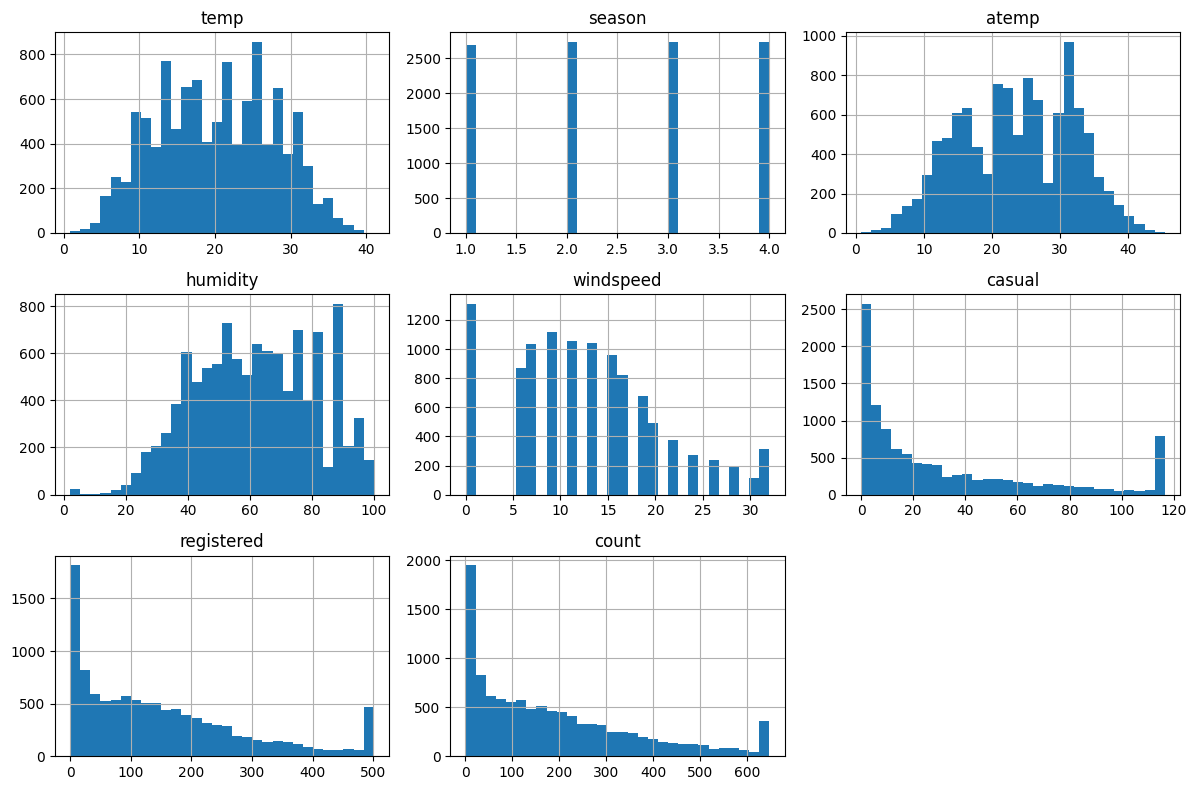

In [26]:

numeric_cols = ['temp','season',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()



## Correlation heatmap

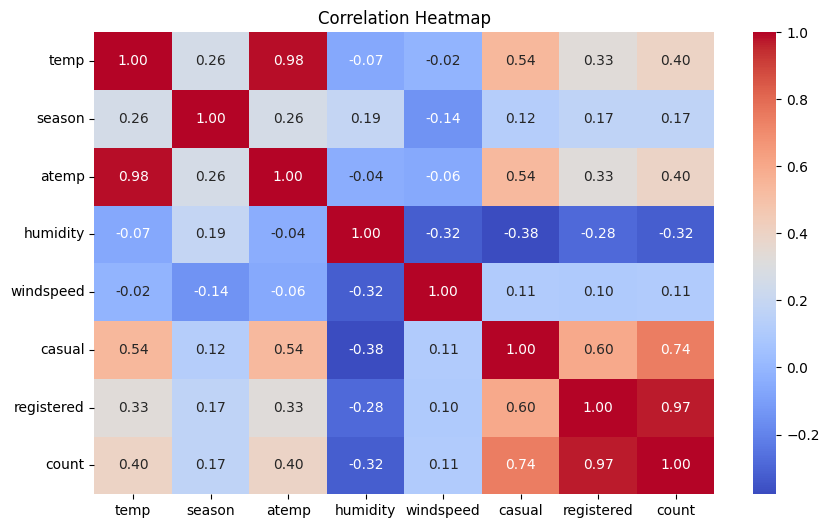

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




##  Encoding Categorical Features

In [10]:
# Encoding Categorical Features

# Identify categorical columns
cat_cols = df.select_dtypes(include="object").columns
print("Categorical Columns:", cat_cols.tolist())

# Example: One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Transformed Shape:", df.shape)
df.head()


Categorical Columns: ['datetime']
Transformed Shape: (10886, 10896)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,datetime_2012-12-19 14:00:00,datetime_2012-12-19 15:00:00,datetime_2012-12-19 16:00:00,datetime_2012-12-19 17:00:00,datetime_2012-12-19 18:00:00,datetime_2012-12-19 19:00:00,datetime_2012-12-19 20:00:00,datetime_2012-12-19 21:00:00,datetime_2012-12-19 22:00:00,datetime_2012-12-19 23:00:00
0,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,...,False,False,False,False,False,False,False,False,False,False
3,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,...,False,False,False,False,False,False,False,False,False,False
4,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
